In [304]:
import os, glob
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib
plt.rcParams['figure.facecolor'] = 'white'

In [305]:
# plt.scatter(df.r,df.dPdr,1,df.t)
def plot_rels(df):
    cdat=df.tlf.values
    cdatmx=np.max(cdat)
    cdatmn=np.min(cdat)

    # cmap = plt.get_cmap('tab20',ncol)
    #get discrete colormap
    ncol=int(cdatmx-cdatmn+1)
    from_list = matplotlib.colors.LinearSegmentedColormap.from_list
    cmap = from_list(None, plt.cm.tab20(range(0,ncol)), ncol)

    fig,axs=plt.subplots(2,2,dpi=200,figsize=(8,6))
    plt.subplots_adjust(wspace=0.25)

    ax=axs.flat[0]
    h=ax.scatter(df.dPdr,df.Vrcol,1,df.tlf,cmap=cmap)
    h.set_clim(cdatmn-0.5, cdatmx+0.5)
    cax = plt.colorbar(h, ticks=np.arange(cdatmn,cdatmx+1),ax=ax)
    ax.grid(True)
    ax.set_xlabel('dP/dr')
    ax.set_ylabel('Vr$_{Col}$')

    ax=axs.flat[1]
    h=ax.scatter(df.dPdr,df.Vt10,1,df.tlf,cmap=cmap)
    h.set_clim(cdatmn-0.5, cdatmx+0.5)
    cax = plt.colorbar(h, ticks=np.arange(cdatmn,cdatmx+1),ax=ax)
    ax.grid(True)
    ax.set_xlabel('dP/dr')
    ax.set_ylabel('Vt$_{10}$')

    ax=axs.flat[2]
    h=ax.scatter(df.Vt10,df.Vrcol,1,df.tlf,cmap=cmap)
    h.set_clim(cdatmn-0.5, cdatmx+0.5)
    cax = plt.colorbar(h, ticks=np.arange(cdatmn,cdatmx+1),ax=ax)
    ax.grid(True)
    ax.set_xlabel('Vt$_{10}$')
    ax.set_ylabel('Vr$_{Col}$');

    axs.flat[3].axis('off')

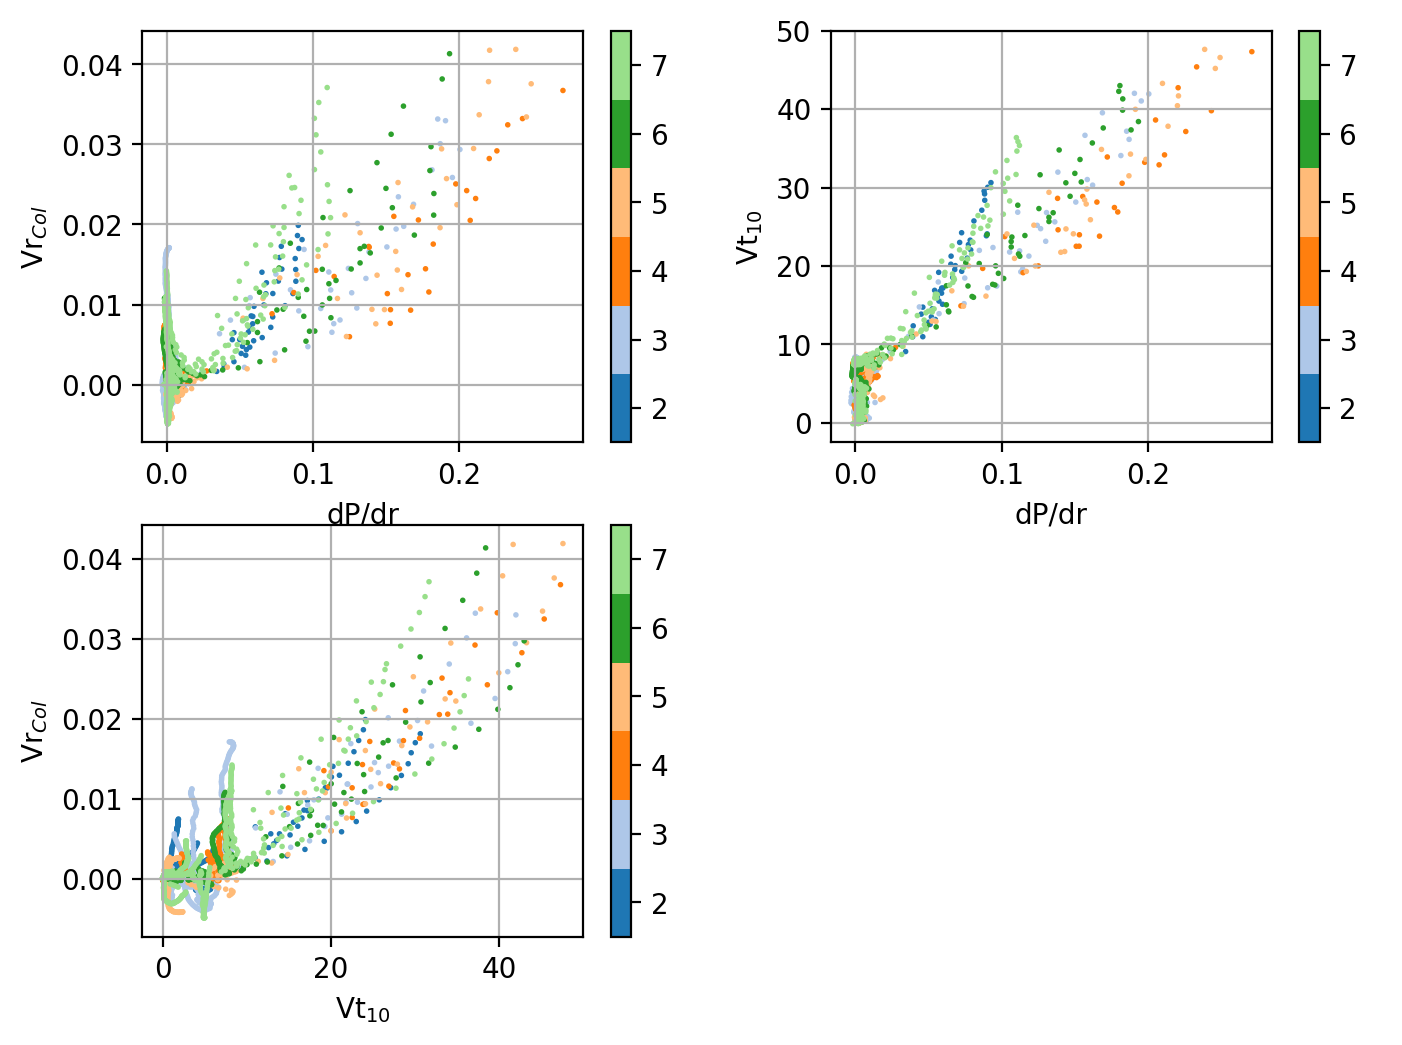

In [306]:
df=pd.read_pickle('rundf/df_lin_dry_rr')
df=df[df.tlf.ge(1) & df.tlf.le(7) & df.r.gt(5)]
df=df.query('r < rV10max*1.0')
plot_rels(df)